In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


#Entire Data Set Available Here: https://www.kaggle.com/currie32/crimes-in-chicago

#So as to be manageable in a Jupyter Notebook, I used a local machine to aggregate the data into crime counts
#by year, type of crime, and police district

Crime_Data = pd.read_csv("Concat_CC_Data.csv")

In [47]:
#remove a few bad lines with erroneous years

Crime_Data["Year"] = Crime_Data["Year"].astype(int)
Crime_Data = Crime_Data[(Crime_Data["Year"] > 2000) & (Crime_Data["Year"] < 2017)]

Crime_Data.head()

,Year,District,Primary Type,Count
1,2001,1,ASSAULT,664
2,2001,1,BATTERY,1321
3,2001,1,BURGLARY,332
4,2001,1,CRIM SEXUAL ASSAULT,34
5,2001,1,CRIMINAL DAMAGE,868


In [48]:
Crime_Data["Primary Type"].unique()

array(['ASSAULT', 'BATTERY', 'BURGLARY', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'GAMBLING', 'HOMICIDE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION',
       'MOTOR VEHICLE THEFT', 'NARCOTICS', 'OFFENSE INVOLVING CHILDREN',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING',
       'THEFT', 'WEAPONS VIOLATION', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL', 'HUMAN TRAFFICKING',
       'CONCEALED CARRY LICENSE VIOLATION'], dtype=object)

In [49]:
#Categorize Crime into areas of interest: Violent and Drugs

Violent = ["ASSAULT", "BATTERY", "BURGLARY", "CRIM SEXUAL ASSAULT", "HOMICIDE", "KIDNAPPING", "MOTOR VEHICLE THEFT",
           "ROBBERY", "SEX OFFENSE", "THEFT", "WEAPONS VIOLATION", "ARSON", "DOMESTIC VIOLENCE", "HUMAN TRAFFICKING"]

Drugs = ["NARCOTICS", "OTHER NARCOTIC VIOLATION"]

In [50]:
#Get Overall Counts by Year

Violent_Counts = (Crime_Data.loc[Crime_Data["Primary Type"].isin(Violent)]
                            .groupby("Year")
                            .agg({"Count": "sum"}))

Homicide_Counts = (Crime_Data.loc[Crime_Data["Primary Type"] == "HOMICIDE"]
                           .groupby("Year")
                           .agg({"Count": "sum"}))

Drug_Counts = (Crime_Data.loc[Crime_Data["Primary Type"].isin(Drugs)]
                         .groupby("Year")
                         .agg({"Count": "sum"}))

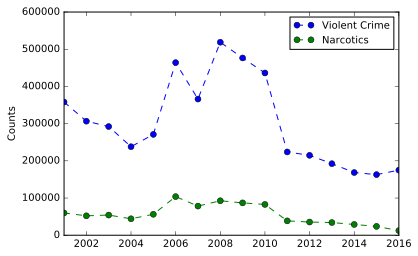

In [81]:
#Visualize Yearly Trends in Violent Crime and Narcotics

plt.plot(Violent_Counts.index, Violent_Counts.values, 'bo--',
         Drug_Counts.index, Drug_Counts.values, 'go--')
plt.axis([2001, 2016, 0, 600000])
plt.ylabel("Counts")
plt.legend(["Violent Crime", "Narcotics"], prop = {'size' : 10})

#Trend shows increase in both btwn 2006-08, then a large drop beginning in 2010-11

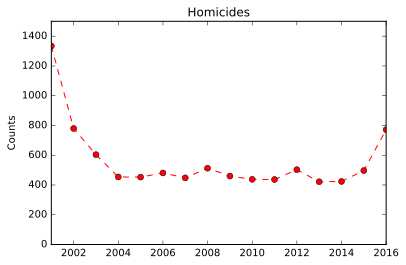

In [87]:
#And Homicides

plt.plot(Homicide_Counts.index, Homicide_Counts.values, 'ro--')
plt.axis([2001, 2016, 0, 1500])
plt.ylabel("Counts")
plt.title("Homicides")

In [108]:
#And, lastly, let's take a quick peak at the most dangerous districts for violent crime

Violent_District = (Crime_Data.loc[Crime_Data["Primary Type"].isin(Violent)]
                               .groupby("District")
                               .agg({"Count" : "sum"}))


Most_Violent = Violent_District.sort_values("Count", ascending=False).iloc[0:5]
Districts = list(Most_Violent.index)

Most_Violent

,Count
District,
8,336712
7,300637
6,289137
25,285364
4,283008


[2001, 2016, 0, 50000]

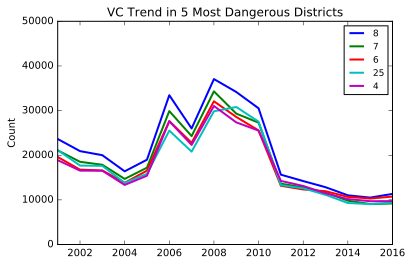

In [141]:
#Now, let's look at trends in these districts by Year

VC_top5 = Crime_Data.loc[(Crime_Data["Primary Type"].isin(Violent)) & (Crime_Data["District"].isin(Districts))]

VC_5yr = VC_top5.groupby(["District", "Year"]).agg({"Count" : "sum"}).reset_index()

for district in Districts:
    temp = VC_5yr[VC_5yr["District"] == district]
    plt.plot(temp["Year"], temp["Count"], linewidth = 2, label=int(district))
    plt.hold(True)

plt.legend(prop = {'size' : 9})
plt.ylabel("Count")
plt.title("VC Trend in 5 Most Dangerous Districts")
plt.axis([2001, 2016, 0, 50000])

In [ ]:
#All five districts trend the same way, indicating there is one or more overarching forces driving the counts